<a href="https://colab.research.google.com/github/KimDeokHwi/Project_humanFall/blob/hyeon_ju/1_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#필요한 모듈 임포트
import os
import cv2
import glob

width: 3840, height: 2160


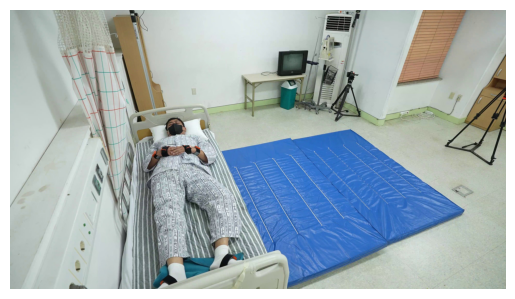

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I001.jpg'

# 이미지 불러오기
img = Image.open(image_path)

# 이미지 크기 확인
# width: 3840, height: 2160
width, height = img.size
print(f'width: {width}, height: {height}')

# 이미지 출력 (Google Colab에서 시각화)
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import cv2
import glob

# 기존 이미지 파일 경로 및 새로운 이미지 저장 폴더 경로 설정
input_folder = '/content/drive/MyDrive/fall_project/data/image'
output_folder = '/content/drive/MyDrive/fall_project/data/resized_images'

# 경로 확인
print(f"Input folder: {input_folder}")
print(f"Output folder: {output_folder}")

# 새로운 폴더 생성 (만약 폴더가 없다면)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 모든 jpg 이미지 파일을 가져오기
file_list = glob.glob(os.path.join(input_folder, '*.jpg'))
print(f"Number of files found: {len(file_list)}")
print(f"Files: {file_list}")

for file_path in file_list:
    # 이미지 읽기
    img = cv2.imread(file_path)

    # 이미지가 정상적으로 로드된 경우에만 처리
    if img is None:
        print(f"Failed to load image: {file_path}")
        continue

    # 원본 이미지의 크기 가져오기
    h, w, c = img.shape

    # 비율 유지하며 640x640에 맞추기 위해 스케일 계산
    scale = 640 / max(h, w)
    new_w = int(w * scale)
    new_h = int(h * scale)

    # 이미지 크기 조정 (비율 유지)
    resized_img = cv2.resize(img, (new_w, new_h))

    # 패딩 추가 (640x640 크기에 맞추기 위해 여백을 채움)
    top = (640 - new_h) // 2
    bottom = 640 - new_h - top
    left = (640 - new_w) // 2
    right = 640 - new_w - left

    # 패딩을 추가하여 최종 640x640 이미지 생성
    padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # 새로운 폴더에 저장
    output_path = os.path.join(output_folder, os.path.basename(file_path))
    print(f"Saving resized image to: {output_path}")
    cv2.imwrite(output_path, padded_img)

print(f"All images resized and saved in '{output_folder}' folder.")


Input folder: /content/drive/MyDrive/fall_project/data/image
Output folder: /content/drive/MyDrive/fall_project/data/resized_images
Number of files found: 310
Files: ['/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I003.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I005.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I002.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I001.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I004.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I006.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C3_I006.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I009.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C3_I009.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C3_I001.jpg', '/content/drive/MyDrive/fall_project/data/image/00002_H_A_N_C1_I010.jpg', '/content/drive/MyD

# **리사이즈 이미지 확인**

width: 640, height: 640


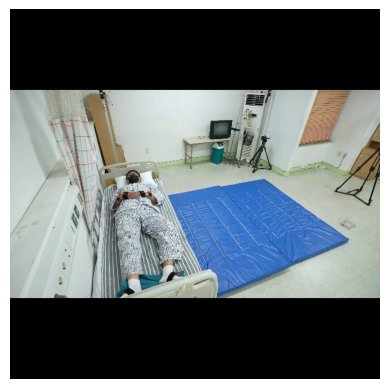

In [ ]:

# 이미지 파일 경로
re_image_path = '/content/drive/MyDrive/fall_project/data/resized_images/00002_H_A_N_C1_I001.jpg'

# 이미지 불러오기
re_img = Image.open(re_image_path)

# 이미지 크기 확인
# width: 3840, height: 2160
width, height = re_img.size
print(f'width: {width}, height: {height}')

# 이미지 출력 (Google Colab에서 시각화)
plt.imshow(re_img)
plt.axis('off')  # 축 숨기기
plt.show()


In [ ]:
##리사이즈 파일 개수 확인##
import os
import glob
from collections import Counter

# 리사이즈된 이미지가 저장된 폴더 경로
resized_image_folder = '/content/drive/MyDrive/fall_project/data/resized_images'

# 모든 jpg 파일 경로 가져오기
image_files = glob.glob(os.path.join(resized_image_folder, '*.jpg'))

# 네 번째 요소를 저장할 리스트
fourth_elements = []

# 각 파일의 이름에서 네 번째 요소 추출
for image_file_path in image_files:
    file_name = os.path.basename(image_file_path)
    split_name = file_name.split('_')

    # 네 번째 요소가 존재할 경우 추가
    if len(split_name) >= 4:
        fourth_elements.append(split_name[3])

# 빈도 계산
element_counts = Counter(fourth_elements)

# 결과 출력
for element, count in element_counts.items():
    print(f"{element}: {count}")


N: 160
BY: 50
FY: 50
SY: 50


In [ ]:
import os
import glob
from collections import defaultdict

# 리사이즈된 이미지들이 저장된 폴더 경로
resized_image_folder = '/content/drive/MyDrive/fall_project/data/resized_images'

# 모든 jpg 파일 경로 가져오기
image_files = glob.glob(os.path.join(resized_image_folder, '*.jpg'))

# 각 ID별로 N, SY, FY, BY의 개수를 저장하기 위한 딕셔너리 초기화
id_counts = defaultdict(lambda: {'N': 0, 'SY': 0, 'FY': 0, 'BY': 0})

# 각 파일의 이름에서 0번째 요소와 4번째 요소 추출
for image_file_path in image_files:
    file_name = os.path.basename(image_file_path)
    split_name = file_name.split('_')

    # 파일명에서 ID 추출 (예: '00002')
    person_id = split_name[0]

    # 네 번째 요소 (N, SY, FY, BY 등) 추출
    if len(split_name) >= 4:
        fourth_element = split_name[3]

        # 해당 ID에 대해 N, SY, FY, BY의 개수 증가
        if fourth_element in id_counts[person_id]:
            id_counts[person_id][fourth_element] += 1

# 결과 출력
for person_id, counts in id_counts.items():
    print(f"{person_id}의 N 개수: {counts['N']}")
    print(f"{person_id}의 SY 개수: {counts['SY']}")
    print(f"{person_id}의 FY 개수: {counts['FY']}")
    print(f"{person_id}의 BY 개수: {counts['BY']}")
    print('-' * 30)


00002의 N 개수: 80
00002의 SY 개수: 0
00002의 FY 개수: 0
00002의 BY 개수: 0
------------------------------
00006의 N 개수: 80
00006의 SY 개수: 0
00006의 FY 개수: 0
00006의 BY 개수: 0
------------------------------
00050의 N 개수: 0
00050의 SY 개수: 0
00050의 FY 개수: 0
00050의 BY 개수: 50
------------------------------
00007의 N 개수: 0
00007의 SY 개수: 0
00007의 FY 개수: 50
00007의 BY 개수: 0
------------------------------
00004의 N 개수: 0
00004의 SY 개수: 50
00004의 FY 개수: 0
00004의 BY 개수: 0
------------------------------


In [ ]:
import glob
import os

# 리사이즈된 이미지들이 저장된 폴더 경로
resized_image_folder = '/content/drive/MyDrive/fall_project/data/resized_images'

# 모든 jpg 파일 경로 가져오기
image_files = glob.glob(os.path.join(resized_image_folder, '*.jpg'))

# 파일 개수 출력
print(f"총 파일 개수: {len(image_files)}")


총 파일 개수: 310




---

